In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine_dt = pd.read_csv('winequality-red.csv')

In [3]:
wine_dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dt.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_dt.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
#Null values
wine_dt.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Renaming columns as per naming standards
wine_dt.rename({'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},axis=1,inplace=True)

In [9]:
wine_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


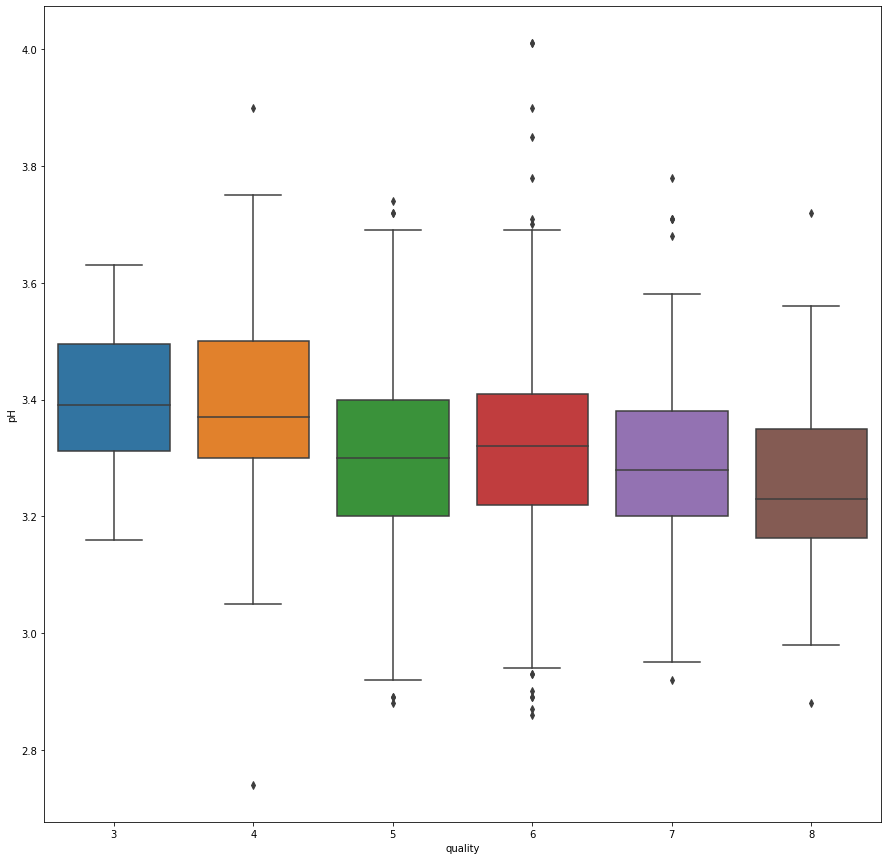

In [10]:
plt.figure(figsize=(15,15))
y=wine_dt.pH
x=wine_dt.quality
sns.boxplot(x,y)

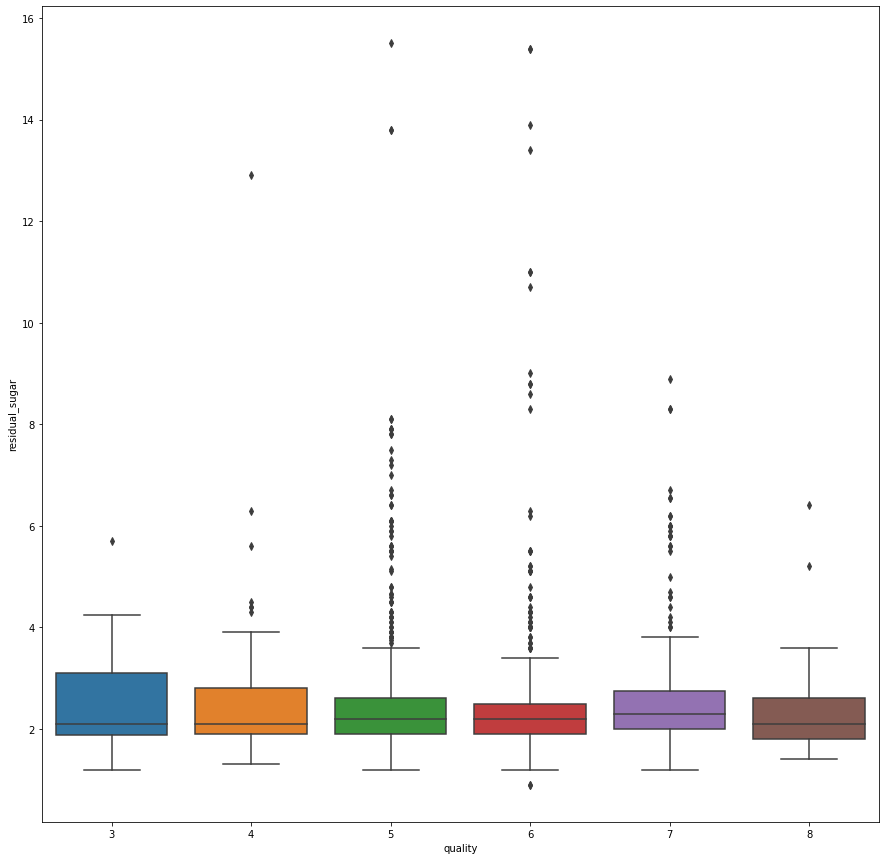

In [11]:
plt.figure(figsize=(15,15))
y=wine_dt.residual_sugar
x=wine_dt.quality
sns.boxplot(x,y)

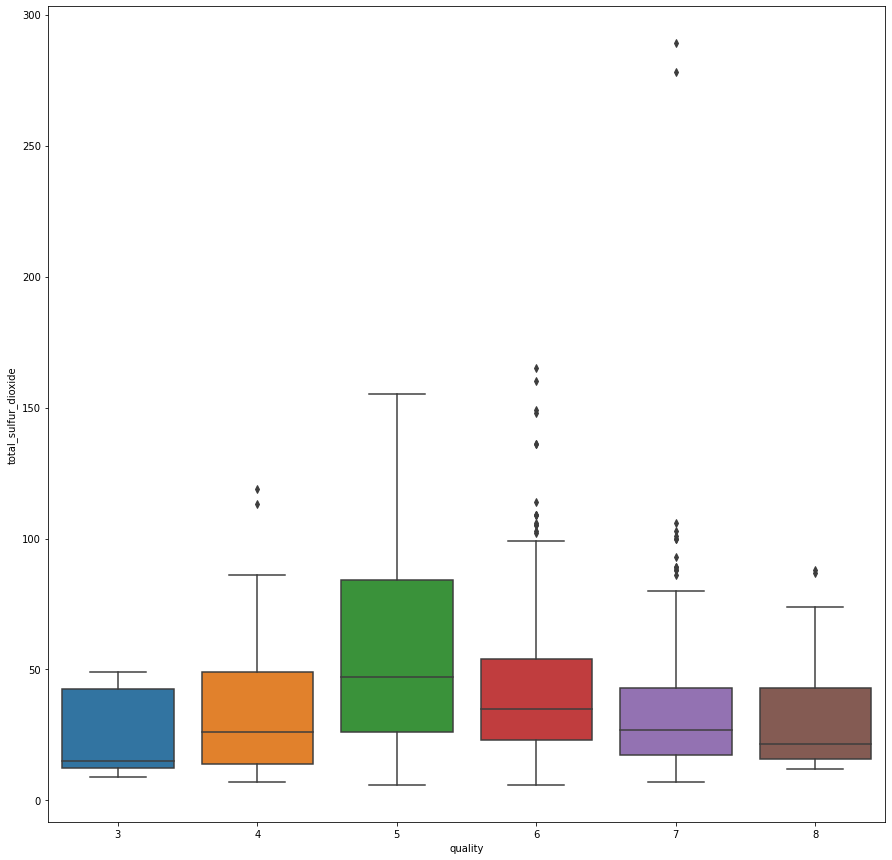

In [12]:
plt.figure(figsize=(15,15))
y=wine_dt.total_sulfur_dioxide
x=wine_dt.quality
sns.boxplot(x,y)

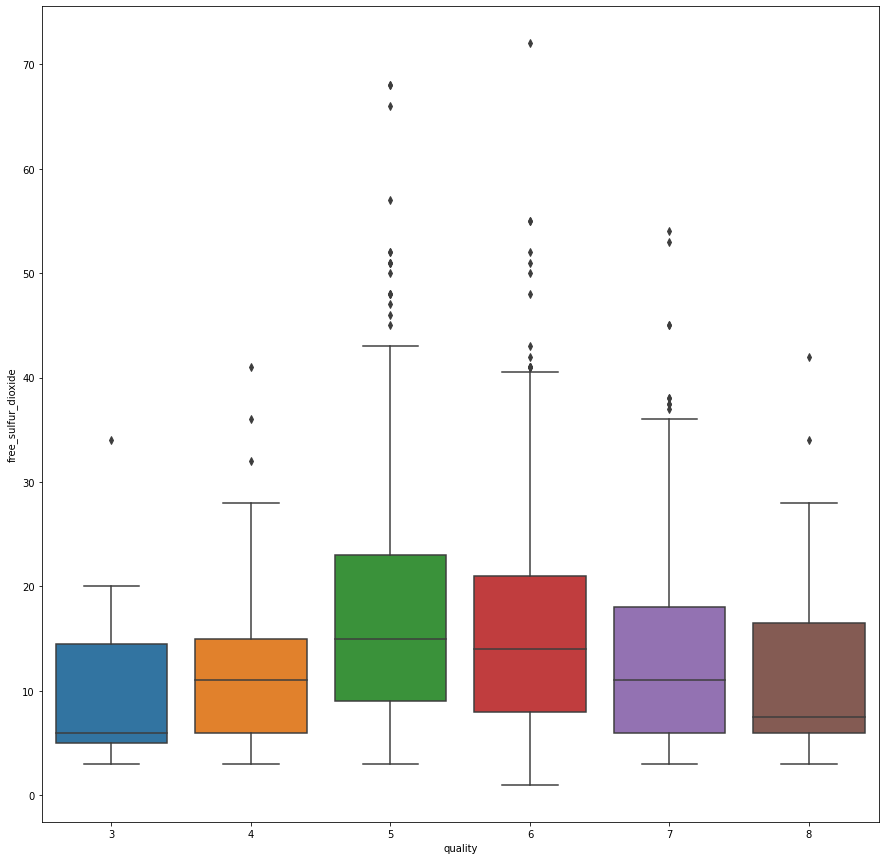

In [13]:
plt.figure(figsize=(15,15))
y=wine_dt.free_sulfur_dioxide
x=wine_dt.quality
sns.boxplot(x,y)

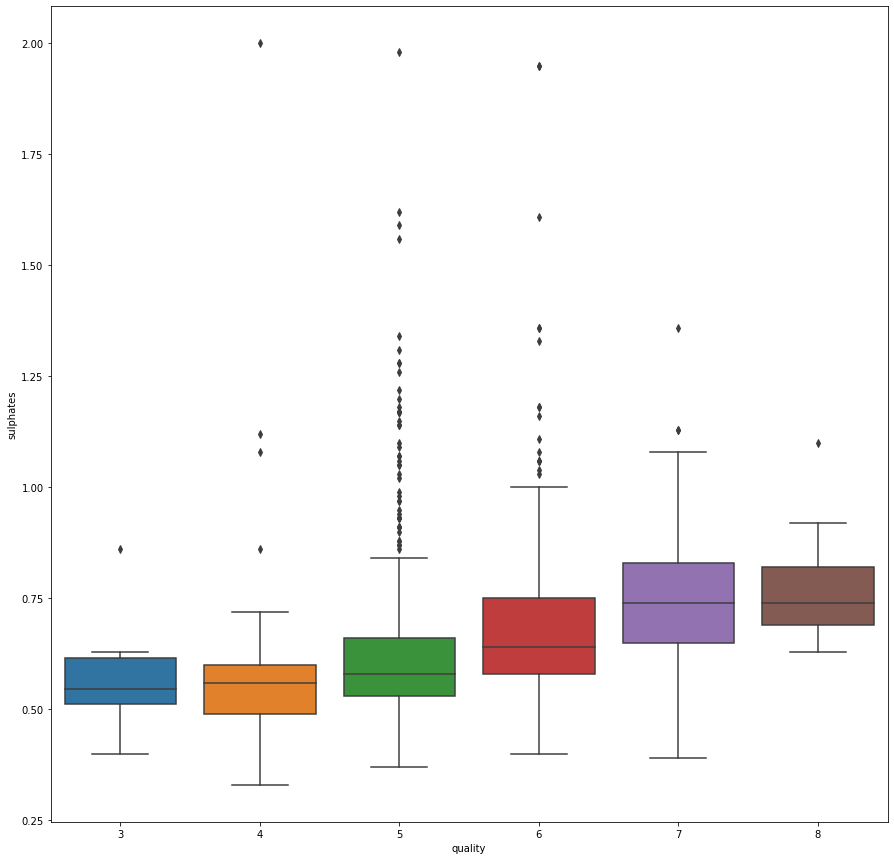

In [14]:
plt.figure(figsize=(15,15))
y=wine_dt.sulphates
x=wine_dt.quality
sns.boxplot(x,y)

In [15]:
#From the graphs we dont see any major patterns among the different qualities of wine
#Will classify wines of quality 3,4,5 as 0 and 6,7,8 as 1
#0 - wine of mediocre quality
#1 - wine of excellent qualtiy

In [16]:
qualityLabel = []
for i in wine_dt['quality']:
    if i >= 3 and i <= 5:
        qualityLabel.append('0')
    else:
        qualityLabel.append('1')

wine_dt['qualityLabel'] = qualityLabel

In [17]:
X,y=wine_dt.drop(['quality','qualityLabel'],axis=1),wine_dt['qualityLabel']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=143)

In [20]:
[X_train.shape,
y_train.shape,
 X_test.shape,
 y_test.shape]

[(1119, 11), (1119,), (480, 11), (480,)]

In [21]:
import xgboost

In [22]:
model = xgboost.XGBClassifier()

In [23]:
model.fit(X_train,y_train)

XGBClassifier()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
accuracy_score(y_test,pred)

0.7270833333333333

In [27]:
confusion_matrix(y_test,pred)

array([[163,  70],
       [ 61, 186]], dtype=int64)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       233
           1       0.73      0.75      0.74       247

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



In [29]:
#Classification using Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [31]:
rfc = RandomForestClassifier()

In [32]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [34]:
pred_rf=rfc.predict(X_test_scaled)

In [35]:
accuracy_score(y_test,pred_rf)

0.775

In [36]:
confusion_matrix(y_test,pred_rf)

array([[183,  50],
       [ 58, 189]], dtype=int64)

In [37]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       233
           1       0.79      0.77      0.78       247

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.77       480
weighted avg       0.78      0.78      0.78       480



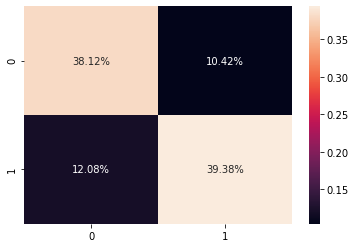

In [41]:
#Plotting confusion matrix
cf_mat = confusion_matrix(y_test,pred_rf)
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%')